In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
%matplotlib inline
import xarray as xr
import numpy as np
import os
from pprint import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy 
from datetime import datetime
import cmocean
import pandas as pd
#import modules.basic_stats as bst
#import modules.plotting_module as pltm
import intake
import xarray
import xesmf as xe
import cftime
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.util import add_cyclic_point

In [12]:
tas_p2 = xr.open_dataset('/home/scrd106/model_output/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/Amon/tas//gn/v20190429/tas_Amon_CanESM5_piControl_r1i1p2f1_gn_555001-560012.nc')
tas_obs_rnf = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-pi-obs-runoff-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-pi-obs-runoff-01/piControl/r1i1p2f1/Amon/tas/gn/v20190429/tas*.nc')
tas_glb_spd = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-pi-glo-spread-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-pi-glo-spread-01/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')
tas_rdy_snc = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/rdy001/esm-pi-sc/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-esm-pi-sc/piControl/r1i1p1f1/Amon/tas/gn/v20190429/*.nc')
tas_varcons = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-04/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-04/piControl/r1i1p2f1/Amon/tas/gn/v20190429/*.nc')

In [13]:
siconc_p2 = xr.open_dataset('/home/scrd106/model_output/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/piControl/r1i1p2f1/SImon/siconc//gn/v20190429/siconc_SImon_CanESM5_piControl_r1i1p2f1_gn_555001-560012.nc')
siconc_obs_rnf = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-pi-obs-runoff-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-pi-obs-runoff-01/piControl/r1i1p2f1/SImon/siconc/gn/v20190429/siconc*.nc')
siconc_glb_spd = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-pi-glo-spread-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-pi-glo-spread-01/piControl/r1i1p2f1/SImon/siconc/gn/v20190429/*.nc')
siconc_rdy_snc = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/rdy001/esm-pi-sc/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-esm-pi-sc/piControl/r1i1p1f1/SImon/siconc/gn/v20190429/*.nc')
siconc_varcons = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-04/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-04/piControl/r1i1p2f1/SImon/siconc/gn/v20190429/*.nc')
siconc_cons_02 = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-02/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-02/piControl/r1i1p2f1/SImon/siconc/gn/v20190429/*.nc')
siconc_cons_01 = xr.open_mfdataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-si-sno-01/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-si-sno-01/piControl/r1i1p2f1/SImon/siconc/gn/v20190429/*.nc')

/home/ncs001/.conda/envs/py3_sofia_analysis/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [14]:
len(tas_obs_rnf.time)/12

451.0

In [15]:
len(siconc_varcons.time)/12

451.0

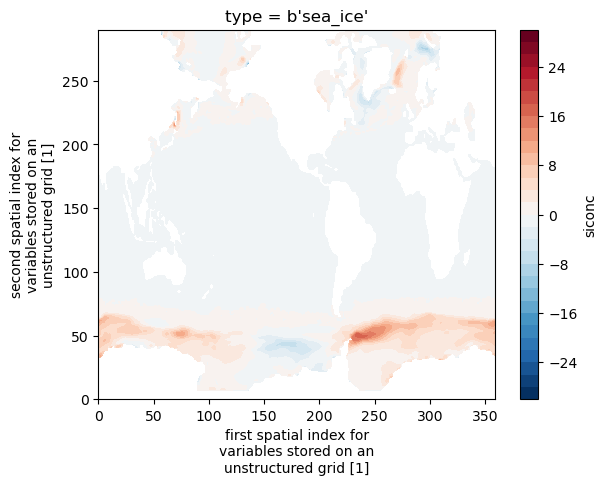

In [16]:
(siconc_obs_rnf.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot.contourf(levels=np.arange(-30,31,2))

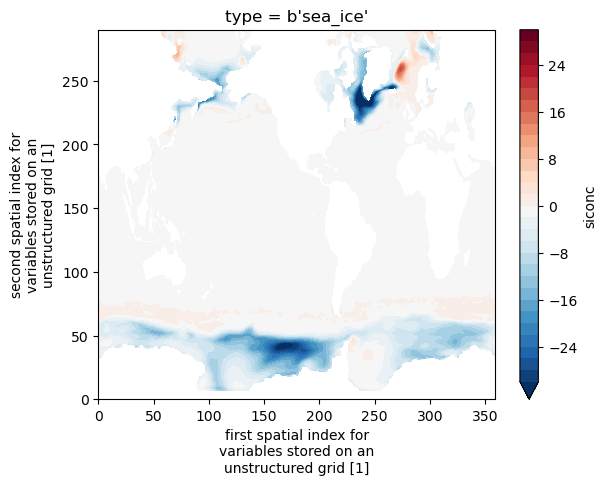

In [17]:
(siconc_glb_spd.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot.contourf(levels=np.arange(-30,31,2))

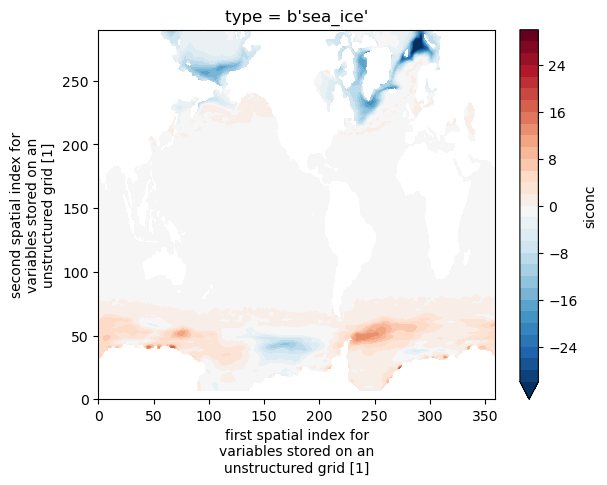

In [18]:
(siconc_rdy_snc.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot.contourf(levels=np.arange(-30,31,2))

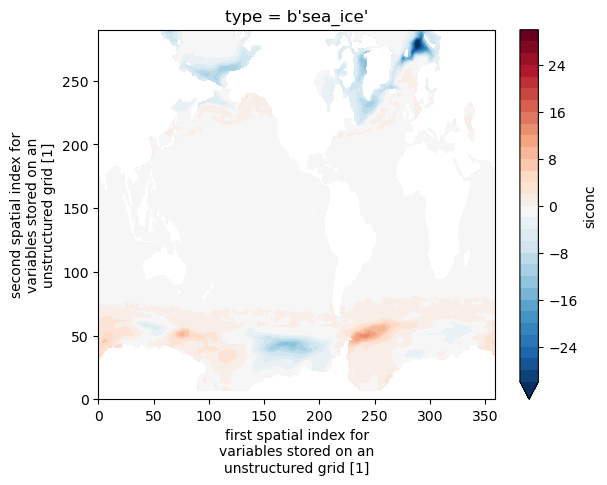

In [19]:
(siconc_varcons.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot.contourf(levels=np.arange(-30,31,2))
plt.savefig('CanESM5-varcons_vs_CanESM5.0_pi_siconc.png', bbox_inches='tight', dpi=300)

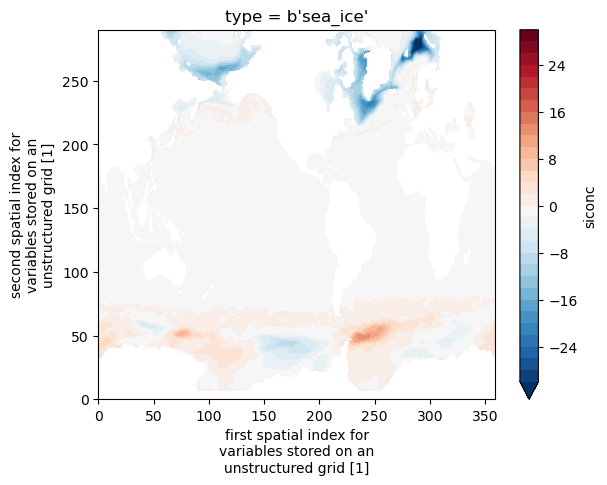

In [20]:
(siconc_cons_02.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot.contourf(levels=np.arange(-30,31,2))

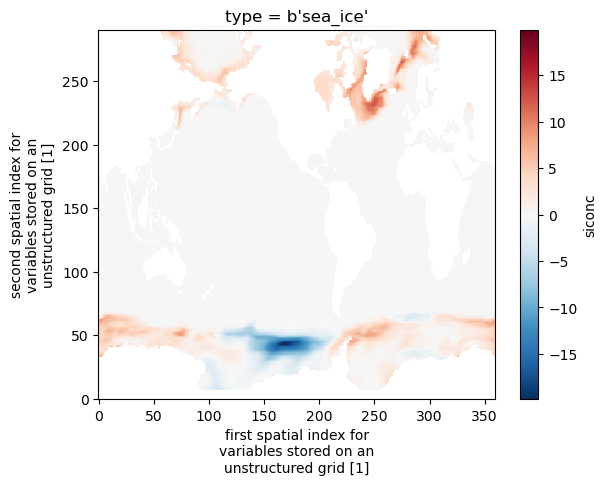

In [21]:
(siconc_cons_01.mean(dim='time') - siconc_p2.mean(dim='time')).siconc.plot()

In [22]:
len(siconc_varcons.time)

5412

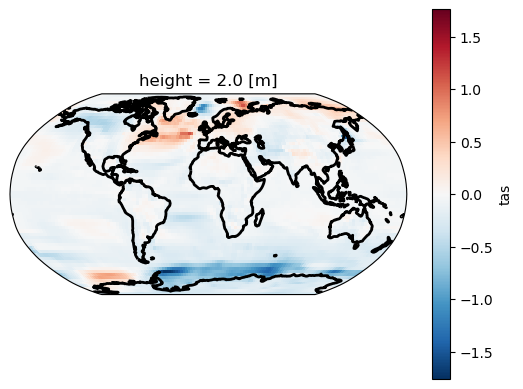

In [23]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_obs_rnf.mean(dim='time') - tas_p2.mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

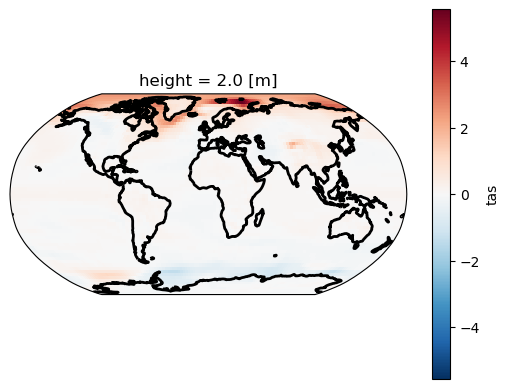

In [24]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_rdy_snc.mean(dim='time') - tas_p2.mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

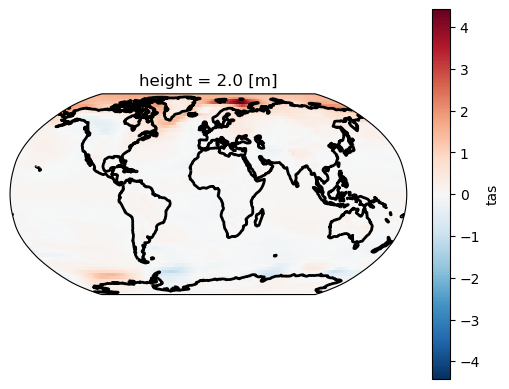

In [25]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_varcons.mean(dim='time') - tas_p2.mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

In [26]:
tas_varcons_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/users/scrd103/v5.0-his-varsno/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-v5.0-his-varsno/historical/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5-v5.0-his-varsno_historical_r1i1p2f1_gn_185001-201412.nc')
tas_v51_p1_his = xr.open_mfdataset('/home/scrd106/model_output/canesm-5.1/v5.1-histens-01/output/CMIP6/CCCma/CCCma/CanESM5-v5.1-histens-01/historical/r1i1p1f1/Amon/tas/gn/v20190429/tas*.nc')
tas_v50_p2_his = xr.open_dataset('/home/scrd106/model_output/CMIP6/final/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p2f1/Amon/tas/gn/v20190429/tas_Amon_CanESM5_historical_r1i1p2f1_gn_185001-201412.nc')

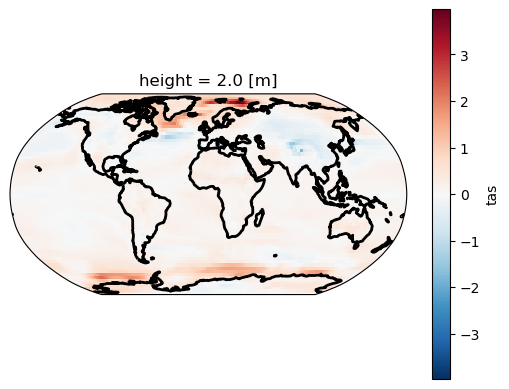

In [27]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_varcons_his.sel(time=slice('1980', '2010')).mean(dim='time') - 
 tas_v51_p1_his.sel(time=slice('1980', '2010')).mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

In [28]:
tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time')

<xarray.Dataset>
Dimensions:   (lat: 64, bnds: 2, lon: 128)
Coordinates:
  * lat       (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height    float64 ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
    lon_bnds  (lon, bnds) float64 -1.406 1.406 1.406 4.219 ... 355.8 355.8 358.6
    tas       (lat, lon) float32 246.9 246.7 246.5 246.3 ... 242.1 242.2 242.3

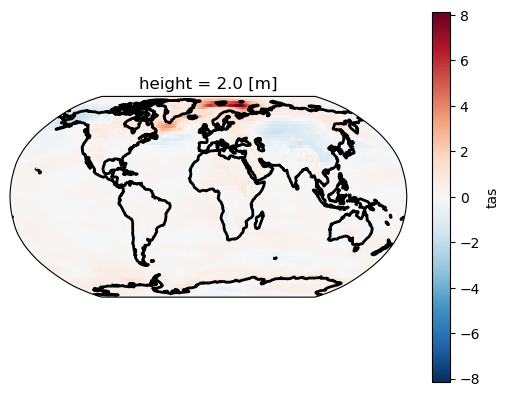

In [29]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time') - 
 tas_v51_p1_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

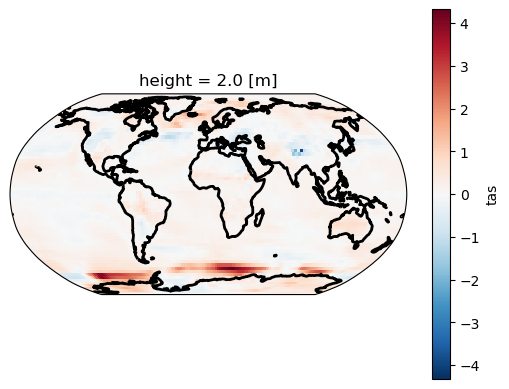

In [30]:
ax = plt.subplot(111, projection=ccrs.Robinson())
(tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time') - 
 tas_v51_p1_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time')).tas.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(linewidth=2)

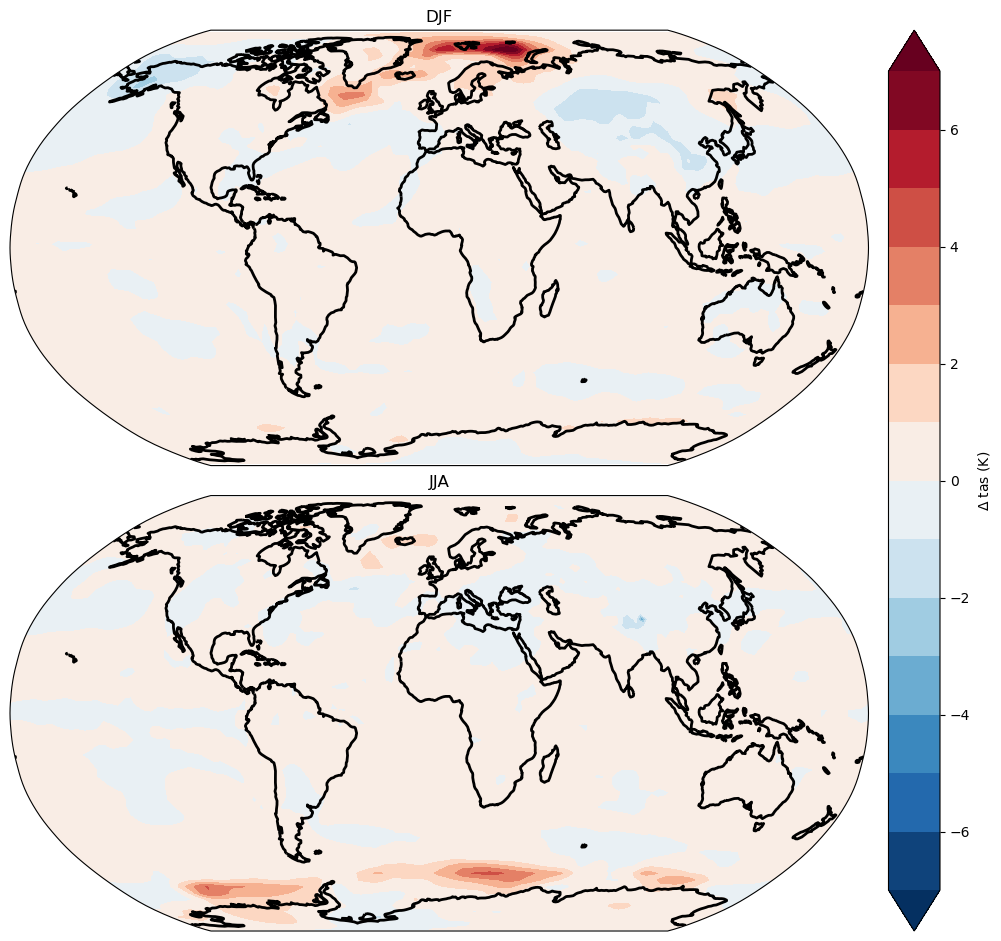

In [31]:
fig = plt.figure(figsize=(12,12))

projection=ccrs.Robinson()
axes_class = (GeoAxes,
                  dict(projection=projection))

grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(2, 1),
                    axes_pad=0.3,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
                
ax1 = grid[0]
ax2 = grid[1]
levels=np.arange(-7,8)
cmap='RdBu_r'
tas_anom_djf = (tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time') - 
 tas_v51_p1_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time')
).tas

lon = tas_anom_djf.coords['lon']
lon_idx = tas_anom_djf.dims.index('lon')
tas_anom_djf_cy, lon_cy = add_cyclic_point(tas_anom_djf.values, coord=lon, axis=lon_idx)

ax1.contourf(lon_cy, tas_anom_djf.lat, tas_anom_djf_cy, levels=levels, cmap=cmap,
             transform=ccrs.PlateCarree(), extend='both')
ax1.set_title('DJF')
tas_anom_jja=(tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time') - 
 tas_v51_p1_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time')
).tas

lon = tas_anom_jja.coords['lon']
lon_idx = tas_anom_jja.dims.index('lon')
tas_anom_jja_cy, lon_cy = add_cyclic_point(tas_anom_jja.values, coord=lon, axis=lon_idx)

cb_tasan=ax2.contourf(lon_cy, tas_anom_jja.lat, tas_anom_jja_cy, levels=levels, cmap=cmap,
                      transform=ccrs.PlateCarree(), extend='both')
ax2.set_title('JJA')
for ax in [ax1, ax2]:
    ax.coastlines(linewidth=2)
    ax.set_global()
grid.cbar_axes[0].colorbar(cb_tasan,extend='both', label =r'$\Delta$ tas (K)')
fig.savefig('CanESM5-varso_minus_CanESM5.1p1_historical_1980-2010_tas.png', bbox_inches='tight', dpi=300)

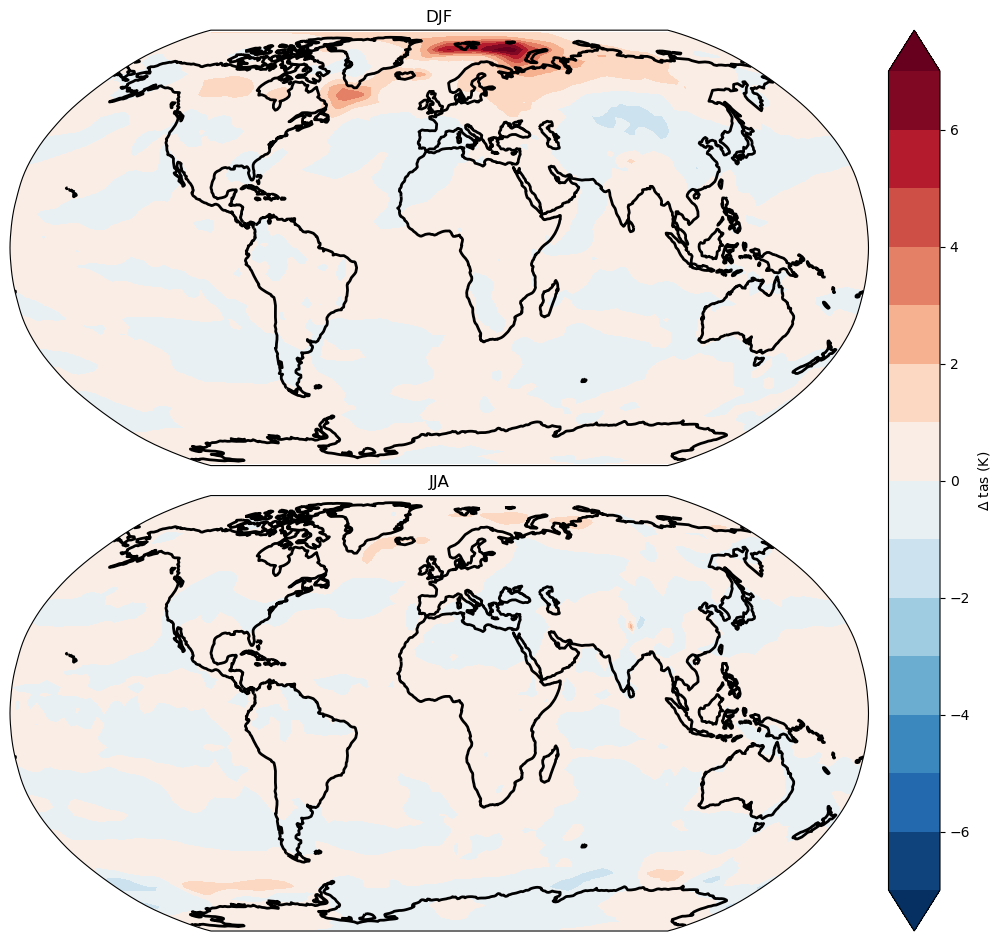

In [32]:
fig = plt.figure(figsize=(12,12))

projection=ccrs.Robinson()
axes_class = (GeoAxes,
                  dict(projection=projection))

grid = AxesGrid(fig, 111, axes_class=axes_class,
                    nrows_ncols=(2, 1),
                    axes_pad=0.3,
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=0.2,
                    cbar_size='3%',
                    label_mode='')  # note the empty label_modead=0.05
                
ax1 = grid[0]
ax2 = grid[1]
levels=np.arange(-7,8)
cmap='RdBu_r'
tas_anom_djf = (tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time') - 
 tas_v50_p2_his.sel(time=slice('1980', '2010')).groupby('time.season')['DJF'].mean(dim='time')
).tas

lon = tas_anom_djf.coords['lon']
lon_idx = tas_anom_djf.dims.index('lon')
tas_anom_djf_cy, lon_cy = add_cyclic_point(tas_anom_djf.values, coord=lon, axis=lon_idx)

ax1.contourf(lon_cy, tas_anom_djf.lat, tas_anom_djf_cy, levels=levels, cmap=cmap,
             transform=ccrs.PlateCarree(), extend='both')
ax1.set_title('DJF')
tas_anom_jja=(tas_varcons_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time') - 
 tas_v50_p2_his.sel(time=slice('1980', '2010')).groupby('time.season')['JJA'].mean(dim='time')
).tas

lon = tas_anom_jja.coords['lon']
lon_idx = tas_anom_jja.dims.index('lon')
tas_anom_jja_cy, lon_cy = add_cyclic_point(tas_anom_jja.values, coord=lon, axis=lon_idx)

cb_tasan=ax2.contourf(lon_cy, tas_anom_jja.lat, tas_anom_jja_cy, levels=levels, cmap=cmap,
                      transform=ccrs.PlateCarree(), extend='both')
ax2.set_title('JJA')
for ax in [ax1, ax2]:
    ax.coastlines(linewidth=2)
    ax.set_global()
grid.cbar_axes[0].colorbar(cb_tasan,extend='both', label =r'$\Delta$ tas (K)')
fig.savefig('CanESM5-varso_minus_CanESM5.0p2_historical_1980-2010_tas.png', bbox_inches='tight', dpi=300)